In [1]:
%matplotlib inline

# ----------------------------------------------------------------------
# Created: 2020-08-26
# Last-Updated: 
# Filename: descriptive_analysis.ipynb
# Author: Yinan Yu
# Description:  
# If you have any questions or comments, email yinan@chalmers.se or 
# yinan.yu@asymptotic.ai
# Note: the content of this file is subject to change
# ----------------------------------------------------------------------

# Data handling and processing modules
import pandas as pd # table (data frame)
import numpy as np # array

# Scientific modules
import scipy as sp # mathematics
import scipy.stats as stats # statistics
import statsmodels # some additional helper functions
from statsmodels.graphics.mosaicplot import mosaic

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
# import bokeh # interactive plotting

from pprint import pprint # pretty print

import os

# Some settings:
data_dir = "../../data" # data directory
dpi = 100



# Application 1: images as data

## Load data

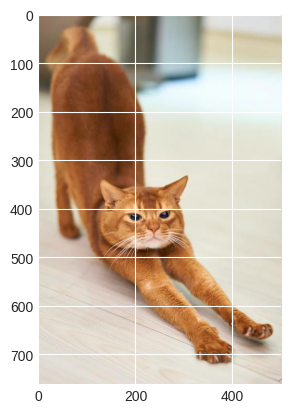

In [2]:
img_path = os.path.join(data_dir, "rgb.png") # Specify data path

img_rgb = plt.imread(img_path) # Load the image
plt.imshow(img_rgb); # Show image alt="An orange cat is stretching with a very content facial expression"

In [3]:
print(">>> The type of the images:", img_rgb.dtype)
print(">>> The shape of the image is:", img_rgb.shape)
print(">>> The values of the image are:")
pprint(img_rgb)

>>> The type of the images: float32
>>> The shape of the image is: (762, 501, 4)
>>> The values of the image are:
array([[[0.57254905, 0.46666667, 0.4       , 1.        ],
        [0.57254905, 0.46666667, 0.4       , 1.        ],
        [0.57254905, 0.46666667, 0.4       , 1.        ],
        ...,
        [0.85490197, 0.85882354, 0.8392157 , 1.        ],
        [0.85490197, 0.85882354, 0.8392157 , 1.        ],
        [0.85490197, 0.85882354, 0.8392157 , 1.        ]],

       [[0.57254905, 0.46666667, 0.4       , 1.        ],
        [0.57254905, 0.46666667, 0.4       , 1.        ],
        [0.57254905, 0.46666667, 0.4       , 1.        ],
        ...,
        [0.85490197, 0.85882354, 0.8392157 , 1.        ],
        [0.85490197, 0.85882354, 0.8392157 , 1.        ],
        [0.85490197, 0.85882354, 0.8392157 , 1.        ]],

       [[0.57254905, 0.46666667, 0.4       , 1.        ],
        [0.57254905, 0.46666667, 0.4       , 1.        ],
        [0.57254905, 0.46666667, 0.4       ,

>>> The values of images are continuous values now
array([[[0.00224529, 0.00183007, 0.00156863, 0.00392157],
        [0.00224529, 0.00183007, 0.00156863, 0.00392157],
        [0.00224529, 0.00183007, 0.00156863, 0.00392157],
        ...,
        [0.00335256, 0.00336794, 0.00329104, 0.00392157],
        [0.00335256, 0.00336794, 0.00329104, 0.00392157],
        [0.00335256, 0.00336794, 0.00329104, 0.00392157]],

       [[0.00224529, 0.00183007, 0.00156863, 0.00392157],
        [0.00224529, 0.00183007, 0.00156863, 0.00392157],
        [0.00224529, 0.00183007, 0.00156863, 0.00392157],
        ...,
        [0.00335256, 0.00336794, 0.00329104, 0.00392157],
        [0.00335256, 0.00336794, 0.00329104, 0.00392157],
        [0.00335256, 0.00336794, 0.00329104, 0.00392157]],

       [[0.00224529, 0.00183007, 0.00156863, 0.00392157],
        [0.00224529, 0.00183007, 0.00156863, 0.00392157],
        [0.00224529, 0.00183007, 0.00156863, 0.00392157],
        ...,
        [0.00335256, 0.00336794, 0.0

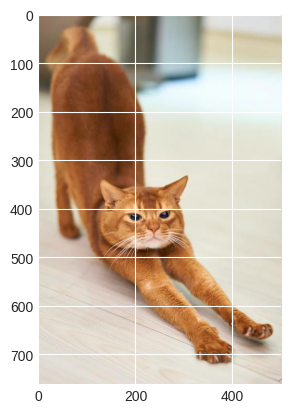

In [4]:
# Convert discrete values (uint8) into "continuous" values (float32)
imgf_rgb = img_rgb.astype(np.float32)/255. # Usually normalize to [0,1]
plt.imshow(img_rgb) # Show image again to make sure we didn't mess it up. alt="Still a proud orange cat stretching"
print(">>> The values of images are continuous values now")
pprint(imgf_rgb)

>>> Gray image has shape: (762, 501)


array([[0.00239139, 0.00239139, 0.00239139, ..., 0.00348328, 0.00348328,
        0.00348328],
       [0.00239139, 0.00239139, 0.00239139, ..., 0.00348328, 0.00348328,
        0.00348328],
       [0.00239139, 0.00239139, 0.00239139, ..., 0.00348328, 0.00348328,
        0.00348328],
       ...,
       [0.00351019, 0.00347559, 0.00342945, ..., 0.00323337, 0.0031757 ,
        0.00319877],
       [0.00347559, 0.00346405, 0.00346405, ..., 0.00329873, 0.00327566,
        0.00327566],
       [0.00347559, 0.00346405, 0.00346405, ..., 0.0033218 , 0.00329873,
        0.00329873]], dtype=float32)

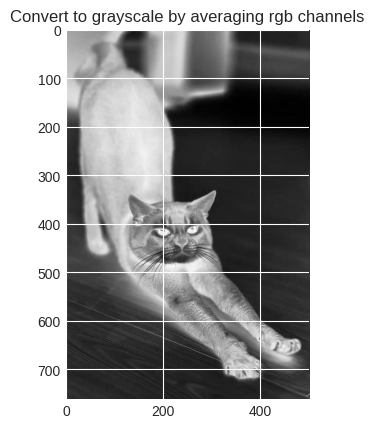

In [5]:
# Convert rgb into grayscale 
imgf_gray = imgf_rgb.mean(axis=2, keepdims=False) # Here we are just taking the mean value over rgb channels. More info: https://en.wikipedia.org/wiki/Grayscale
print(">>> Gray image has shape:", imgf_gray.shape)
plt.imshow(imgf_gray) # alt="A grayscale image of a cat stretching."
plt.title("Convert to grayscale by averaging rgb channels"); # Add title
imgf_gray

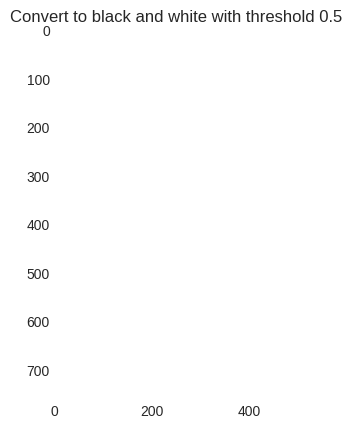

In [6]:
# Convert rgb into black and white
threshold = 0.5
img_bw = np.zeros_like(imgf_gray)
img_bw[imgf_gray>threshold]=1
plt.imshow(img_bw) # alt="A black and white image of a cat stretching."
plt.title("Convert to black and white with threshold 0.5"); # Add title

#### Note
+ These images have different representations: 
    + `img_rgb`: numerical, discrete
    + `imgf_rgb`: numerical, continuous
    + `imgf_gray`: numerical, continuous 
    + `img_bw`: numerical, discrete (binary)  
  Find them in the course map!
+ Images are expressed as arrays - `numpy` is commonly used. 
+ If you are interested in image processing, please explore other libraries such as `opencv`, `scikit-image`, etc. 

## Descriptive analysis
### Histogram

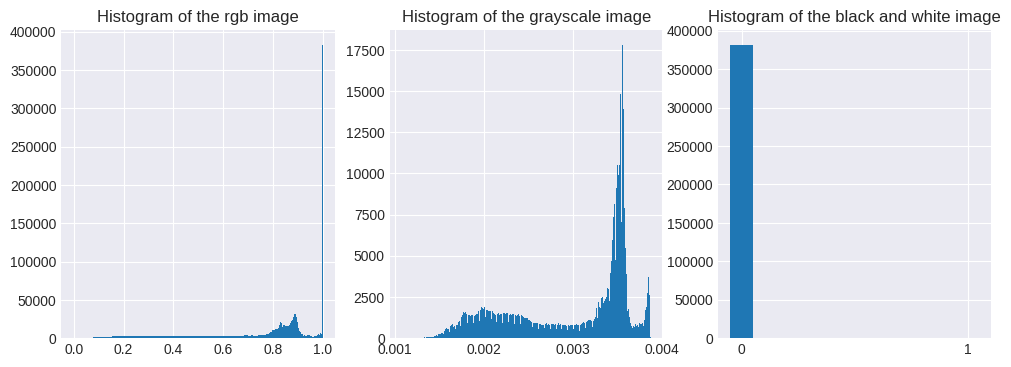

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12,4), dpi= dpi) 
axes[0].hist(img_rgb.flatten(), bins=256) 
axes[0].set_title("Histogram of the rgb image") 
axes[1].hist(imgf_gray.flatten(), bins=256) 
axes[1].set_title("Histogram of the grayscale image") 
axes[2].bar([0,1],[(img_bw.flatten()==0).sum(), 
                   (img_bw.flatten()==1).sum()],
           width=0.1); 
axes[2].set_xticks([0,1]);
axes[2].set_title("Histogram of the black and white image") 
plt.show()

### Descriptive statistics 

In [8]:
# Descriptive statistics
# Take imgf_rgb as example

# 1) Centrality:
print(">>>>> Centrality <<<<<")
data = imgf_rgb.flatten()
mean_rgb = data.mean()
median_rgb = np.median(data)
mode_rgb = stats.mode(data)
print("The image has mean value %.2f" % mean_rgb)
print("The image has median %.2f" % median_rgb)
print("The image has mode %.2f" % mode_rgb[0])
print(">>> Look at the histogram now. How are mean, median and mode reflected in the histogram?")
print("")
# 2) Dispersion: 
print(">>>>> Dispersion <<<<<")
# Range (min, max): 
min_rgb = imgf_rgb.min()
max_rgb = imgf_rgb.max()
print("The image has range %.2f, %.2f)" % (min_rgb, max_rgb))
# Standard deviation:
std_rgb = imgf_rgb.std()
print("The image has standard deviation %.2f" % std_rgb)
# Quantile (q-th quantile):
q0 = np.quantile(imgf_rgb, q=0.1)
q1 = np.quantile(imgf_rgb, q=0.5)
q2 = np.quantile(imgf_rgb, q=0.9)
print("10%s quantile: %f" % ("%", q0))
print("50%s quantile: %f" % ("%", q1))
print("90%s quantile: %f" % ("%", q2))

print("10th, 50th and 90th percentiles are", np.percentile(imgf_rgb, q=[10, 50, 90]))

print("")
print(">>> What are quantiles? How are they related to percentiles?")




>>>>> Centrality <<<<<
The image has mean value 0.00
The image has median 0.00
The image has mode 0.00
>>> Look at the histogram now. How are mean, median and mode reflected in the histogram?

>>>>> Dispersion <<<<<
The image has range 0.00, 0.00)
The image has standard deviation 0.00
10% quantile: 0.001230
50% quantile: 0.003368
90% quantile: 0.003922
10th, 50th and 90th percentiles are [0.0012303  0.00336794 0.00392157]

>>> What are quantiles? How are they related to percentiles?


/tmp/ipykernel_1268326/239143295.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rgb = stats.mode(data)


## Application 2: texts as data, natural language processing 

## Load data

In [9]:
# Input data: two user reviews. 
# In each review, the first word is the category; the second word is the sentiment; the third word is the file id
review1 = "music neg 204.txt generally harmless , except for one very offensive song about siblings that hate each other and hate their parents . the song is probably funny to ultra-sophisticated , cynical adults . but the song is totally inappropriate for a four year old . i wouldn't bring this cd into your house"
review2 = "music neg 723.txt the raising arizona part of the cd is almost exclusively electronic and only one 90 second track of the great banjo that i remember from the movie . i recommend listening to samples before you buy"

In [10]:
words1 = review1.strip().split()[3:]  
words2 = review2.strip().split()[3:]
words = words1 + words2
print(">>> There are %i unique words"%len(words))
print(">>> A bag of words:", words)

vocab = set(words) # Build a vocabulary
print(">>> Vocabulary:", vocab)

>>> There are 87 unique words
>>> A bag of words: ['generally', 'harmless', ',', 'except', 'for', 'one', 'very', 'offensive', 'song', 'about', 'siblings', 'that', 'hate', 'each', 'other', 'and', 'hate', 'their', 'parents', '.', 'the', 'song', 'is', 'probably', 'funny', 'to', 'ultra-sophisticated', ',', 'cynical', 'adults', '.', 'but', 'the', 'song', 'is', 'totally', 'inappropriate', 'for', 'a', 'four', 'year', 'old', '.', 'i', "wouldn't", 'bring', 'this', 'cd', 'into', 'your', 'house', 'the', 'raising', 'arizona', 'part', 'of', 'the', 'cd', 'is', 'almost', 'exclusively', 'electronic', 'and', 'only', 'one', '90', 'second', 'track', 'of', 'the', 'great', 'banjo', 'that', 'i', 'remember', 'from', 'the', 'movie', '.', 'i', 'recommend', 'listening', 'to', 'samples', 'before', 'you', 'buy']
>>> Vocabulary: {'second', 'remember', 'funny', 'adults', 'four', 'is', 'and', 'cd', 'listening', 'only', 'into', 'recommend', 'of', "wouldn't", 'buy', '90', 'one', 'i', 'almost', 'electronic', 'track', '

## Descriptive analysis

### Count

In [11]:
# Do something with the text data
from collections import Counter

word_freqs = Counter(words)
print(">>> Word count:")
print(word_freqs)

>>> Word count:
Counter({'the': 6, '.': 4, 'song': 3, 'is': 3, 'i': 3, ',': 2, 'for': 2, 'one': 2, 'that': 2, 'hate': 2, 'and': 2, 'to': 2, 'cd': 2, 'of': 2, 'generally': 1, 'harmless': 1, 'except': 1, 'very': 1, 'offensive': 1, 'about': 1, 'siblings': 1, 'each': 1, 'other': 1, 'their': 1, 'parents': 1, 'probably': 1, 'funny': 1, 'ultra-sophisticated': 1, 'cynical': 1, 'adults': 1, 'but': 1, 'totally': 1, 'inappropriate': 1, 'a': 1, 'four': 1, 'year': 1, 'old': 1, "wouldn't": 1, 'bring': 1, 'this': 1, 'into': 1, 'your': 1, 'house': 1, 'raising': 1, 'arizona': 1, 'part': 1, 'almost': 1, 'exclusively': 1, 'electronic': 1, 'only': 1, '90': 1, 'second': 1, 'track': 1, 'great': 1, 'banjo': 1, 'remember': 1, 'from': 1, 'movie': 1, 'recommend': 1, 'listening': 1, 'samples': 1, 'before': 1, 'you': 1, 'buy': 1})


#### Note
+ A bag of words is `categorical data`. 
+ These are extremely simplified examples, but they are important building blocks for solving real world problems.
+ Don't underestimate the importance of counting! Very often, this is how you estimate probabilities.

### Bar chart

>>> By looking at the bar chart, what seems to be the limitation of this bag-of-words approach?
>>> In the assignment, you will do something more sophisticated


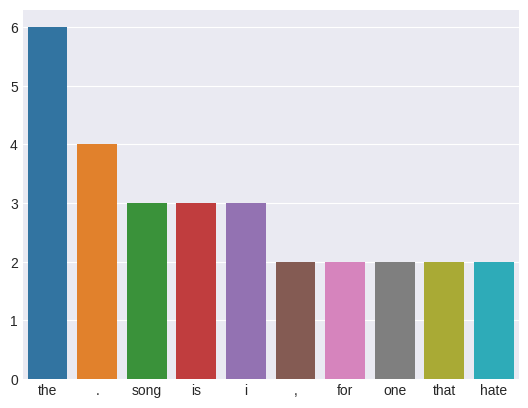

In [12]:
top = dict(word_freqs.most_common(10))
top_words = list(top.keys())
top_freqs = list(top.values())
ax = sns.barplot(x=top_words, y=top_freqs) # Let's try out seaborn
print(">>> By looking at the bar chart, what seems to be the limitation of this bag-of-words approach?")
print(">>> In the assignment, you will do something more sophisticated")

### Pie chart

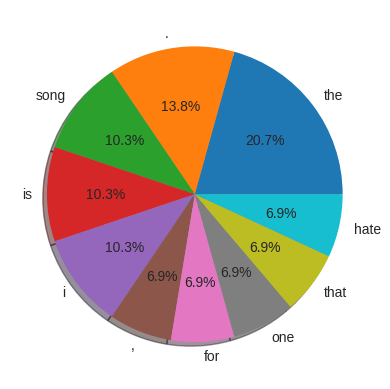

In [13]:
# Usually more confusing than bar chart. But let's show it anyway. It's good for showing percentages. 
plt.pie(top.values(), labels=top.keys(), autopct='%1.1f%%', shadow=True) 
plt.show() 

### Note
- If you are interested in natural language processing, please explore other libraries such as `spacy`. 

## Application 3: a table with numeric values as data

## Load data

In [14]:
# This time, we will grab something from the internet.
# From the book Machine Learning for Hackers
# https://github.com/johnmyleswhite/ML_for_Hackers
src = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
data_gwh = pd.read_csv(src, sep=',', header=1, names=['gender','height','weight'])
print(data_gwh)

      gender     height      weight
0       Male  68.781904  162.310473
1       Male  74.110105  212.740856
2       Male  71.730978  220.042470
3       Male  69.881796  206.349801
4       Male  67.253016  152.212156
...      ...        ...         ...
9994  Female  66.172652  136.777454
9995  Female  67.067155  170.867906
9996  Female  63.867992  128.475319
9997  Female  69.034243  163.852461
9998  Female  61.944246  113.649103

[9999 rows x 3 columns]


In [15]:
# Let's do some cleaning here: 
# Convert the units to the metric system: feet to cm and lbs to kg. 
table_data = data_gwh.copy()
table_data.height = data_gwh.height * 2.54
table_data.weight = data_gwh.weight * 0.45359237

In [16]:
# Inspect data
table_data.head(2)

,gender,height,weight
0,Male,174.706036,73.622792
1,Male,188.239668,96.497629


In [17]:
table_data.tail(5)

,gender,height,weight
9994,Female,168.078536,62.041210
9995,Female,170.350573,77.504378
9996,Female,162.224700,58.275424
9997,Female,175.346978,74.322226
9998,Female,157.338385,51.550366


## Descriptive analysis

In [18]:
print("Explain each row in this table to your rubber duck!")
table_data.describe()

Explain each row in this table to your rubber duck!


,height,weight
count,9999.000000,9999.000000
mean,168.571702,73.224464
std,9.771363,14.560297
min,137.828359,29.347484
25%,161.303580,61.605559
50%,168.447465,73.119948
75%,175.697056,84.890898
max,200.656806,122.465267


### Histogram, quantile and percentile

Just to be clear, quantile is the value on the x axis!
      q    quantile
0  0.05  153.025309
1  0.50  168.447465
2  0.95  184.446770


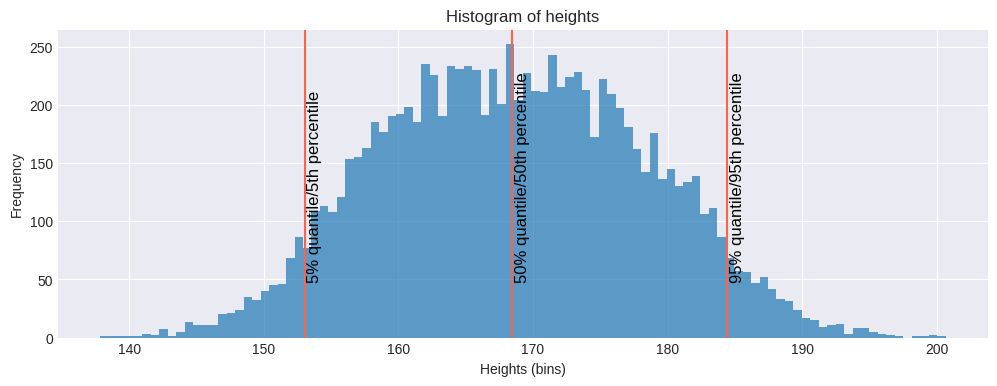

In [19]:
# Histogram and quantile/percentile
# Helper function: add vertical line
def add_vert_line(ax, xs, texts, y, ymin=0, ymax=1):
    for i, x in enumerate(xs):
        ax.text(x+0.2, y, texts[i], rotation=90, color="k", fontsize=12)
        ax.axvline(x, ymin=ymin, ymax=ymax, color="Tomato")
        
fig, ax = plt.subplots(1, 1, figsize=(12,4), dpi=dpi) 
ax.set_xlabel("Heights (bins)")
# Here we try to use pandas built-in histogram plot to see how it works
table_data["height"].plot(y=["height"],kind="hist", bins=100, alpha=0.7, ax=ax, title="Histogram of heights");
q5 = table_data["height"].quantile(0.05) 
q50 = table_data["height"].quantile(0.5)
q95 = table_data["height"].quantile(0.95)

texts = ["5%s quantile/5th percentile"%"%", 
         "50%s quantile/50th percentile"%"%", 
         "95%s quantile/95th percentile"%"%"]
quantiles = [q5, q50, q95]

add_vert_line(ax, quantiles, texts, 50)

print("Just to be clear, quantile is the value on the x axis!")
quantile_table = pd.DataFrame(data = {"q": [0.05, 0.5, 0.95], "quantile": [q5, q50, q95]})

print(quantile_table)

### Note: 
### You need to feel very comfortable with quantiles!!
### Not yet? Okay, here comes more!!! 

Explain why is it more dense in the middle??


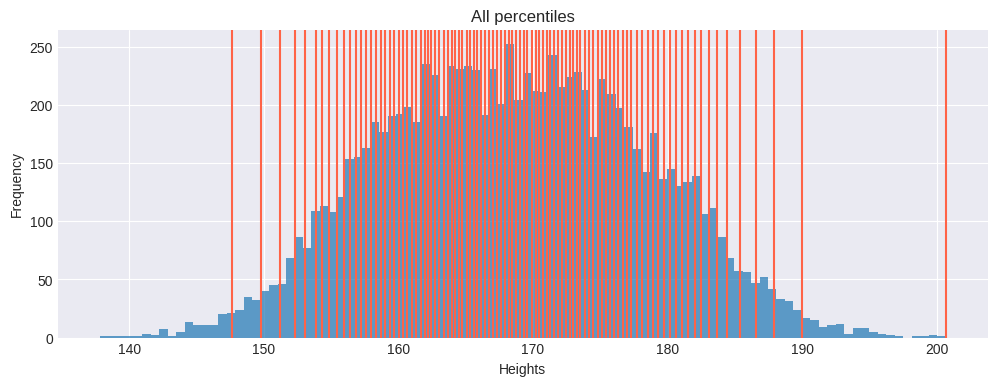

In [20]:
# Now let's draw more quantiles for Gaussian distribution and see how it looks
# Let's draw 100 of them, ranging from 1% to 100% with equal distance - then they are called percentiles 
fig, ax = plt.subplots(1, 1, figsize=(12,4), dpi=dpi) 
ax.set_xlabel("Heights")
table_data["height"].plot(y=["height"],kind="hist", bins=100, alpha=0.7,
                          ax=ax, title="All percentiles");
qs = [q*0.01 for q in range(1, 101)]
percentiles = table_data["height"].quantile(qs) # We can pass in a list of qs to get a list of quantiles back! Convenient! 
add_vert_line(ax, percentiles, [""]*len(list(qs)), 50)

print("Explain why is it more dense in the middle??")


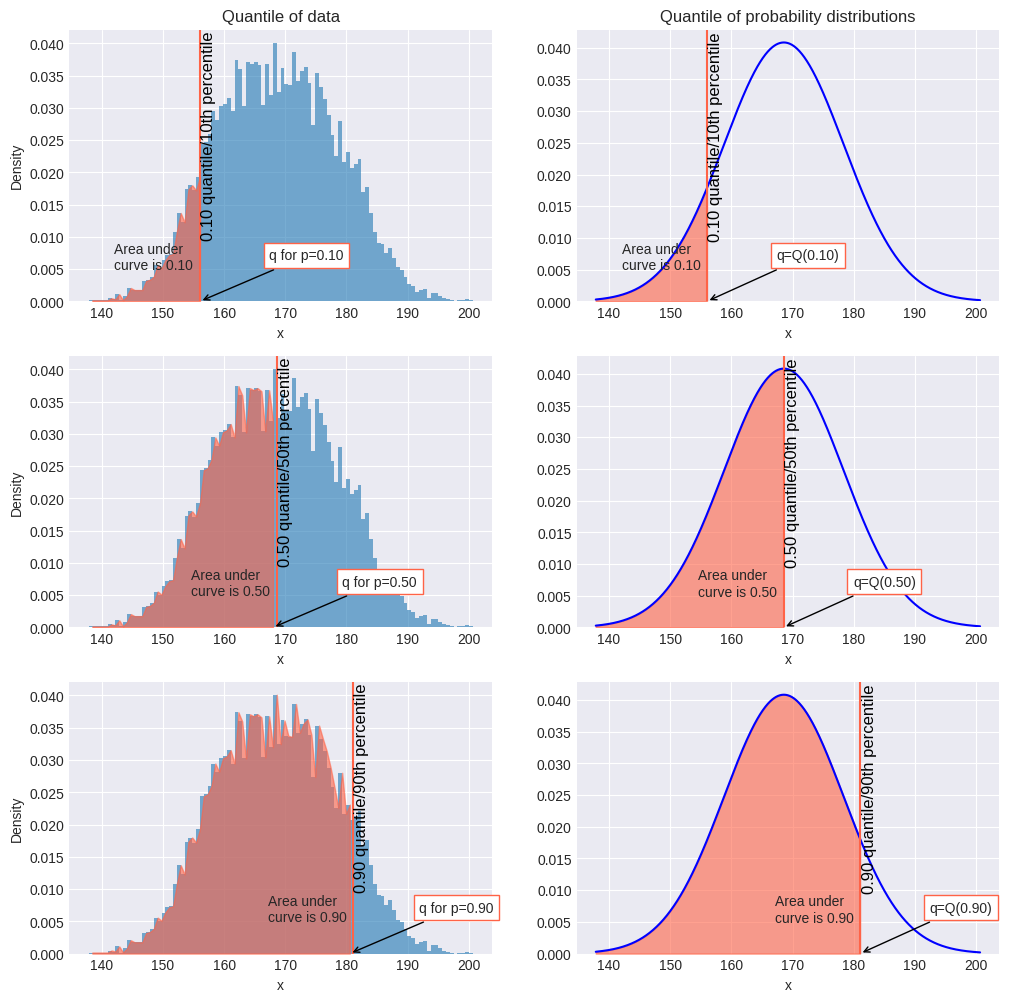

In [21]:
# Check out: https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
fig, axes = plt.subplots(3, 2, figsize=(12,12), dpi=dpi) 

qs = [0.1, 0.5, 0.9]
estimated_mean = table_data.height.mean()
estimated_std = table_data.height.std()
x = np.linspace(table_data.height.min(), table_data.height.max(), num=1000)
pdf = stats.norm.pdf(x, estimated_mean, estimated_std)

for i, q in enumerate(qs):
    hist, bins, _ = axes[i,0].hist(table_data.height, bins=100, density=True, alpha=0.6)
    bins = bins[1:]
    quantile = stats.norm.ppf(q, estimated_mean, estimated_std)
    add_vert_line(axes[i,0], [quantile], ["%.2f quantile/%ith percentile"%(q, qs[i]*100)], 0.01)
    lessthan0 = bins[bins <= quantile]
    hist_lessthan = hist[bins <= quantile] 
    axes[i,0].fill_between(lessthan0, hist_lessthan, 0, color="tomato", alpha=0.6)
    axes[i,0].set_xlabel("x")
    axes[i,0].set_ylabel("Density")
    axes[i,0].annotate("Area under\ncurve is %.2f"%q, (quantile-14, 0.005))
    axes[i,0].annotate("q for p=%.2f"%q, (lessthan0[-1], 0), 
                         xytext=(50, 30), 
                         textcoords="offset points", 
                         arrowprops={"arrowstyle":"->"},
                         bbox=dict(edgecolor="tomato", facecolor="white"))
    
    axes[i,1].plot(x, pdf, c="b")
    axes[i,1].set_ylim(0)
    add_vert_line(axes[i,1], [quantile], ["%.2f quantile/%ith percentile"%(q, int(qs[i]*100))], 0.01)
    lessthan1 = x[x <= quantile]
    pdf_lessthan = pdf[x <= quantile] 
    axes[i,1].fill_between(lessthan1, pdf_lessthan, 0, color="tomato", alpha=0.6)
    axes[i,1].set_xlabel("x");
    axes[i,1].annotate("Area under\ncurve is %.2f"%q, (quantile-14, 0.005))
    axes[i,1].annotate("q=Q(%.2f)"%q, (lessthan1[-1], 0), 
                         xytext=(50, 30), 
                         textcoords="offset points", 
                         arrowprops={"arrowstyle":"->"},
                         bbox=dict(edgecolor="tomato", facecolor="white"))    
    
axes[0,0].set_title("Quantile of data")
axes[0,1].set_title("Quantile of probability distributions");

### One more note on quantile

In [22]:
# Typically, there are interpolations between data points when quantiles are calculated from data. 
# There are different methods to do the interpolation, e.g. "linear" and "midpoint". Linear is the default.  
q5_linear = table_data["height"].quantile(0.05, interpolation="linear") 
q95_linear = table_data["height"].quantile(0.95, interpolation="linear")
print("******** Comparing different interpolation methods for computing quantiles ********")
print("Method: Linear")
print("  5%s:  %.4f"%("%", q5_linear))
print("  95%s: %.4f"%("%", q95_linear))
q5_midpoint = table_data["height"].quantile(0.05, interpolation="midpoint")
q95_midpoint = table_data["height"].quantile(0.95, interpolation="midpoint")
print("Method: Midpoint")
print("  5%s:  %.4f"%("%", q5_midpoint))
print("  95%s: %.4f"%("%", q95_midpoint))

print("")
print("When sample size is small, the difference is more obvious")
subsample = 100
q5_linear_small = table_data["height"][::subsample].quantile(0.05)
q95_linear_small = table_data["height"][::subsample].quantile(0.95)
print("Method: Linear")
print("  5%s:  %.4f"%("%", q5_linear_small))
print("  95%s: %.4f"%("%", q95_linear_small))
q5_midpoint_small = table_data["height"][::subsample].quantile(0.05, interpolation="midpoint")
q95_midpoint_small = table_data["height"][::subsample].quantile(0.95, interpolation="midpoint")
print("Method: Midpoint")
print("  5%s:  %.4f"%("%", q5_midpoint_small))
print("  95%s: %.4f"%("%", q95_midpoint_small))

******** Comparing different interpolation methods for computing quantiles ********
Method: Linear
  5%:  153.0253
  95%: 184.4468
Method: Midpoint
  5%:  153.0246
  95%: 184.4470

When sample size is small, the difference is more obvious
Method: Linear
  5%:  154.0683
  95%: 183.4600
Method: Midpoint
  5%:  153.6880
  95%: 184.1279


### Normalized histogram, kernel density estimator (KDE) and probability density function (PDF)

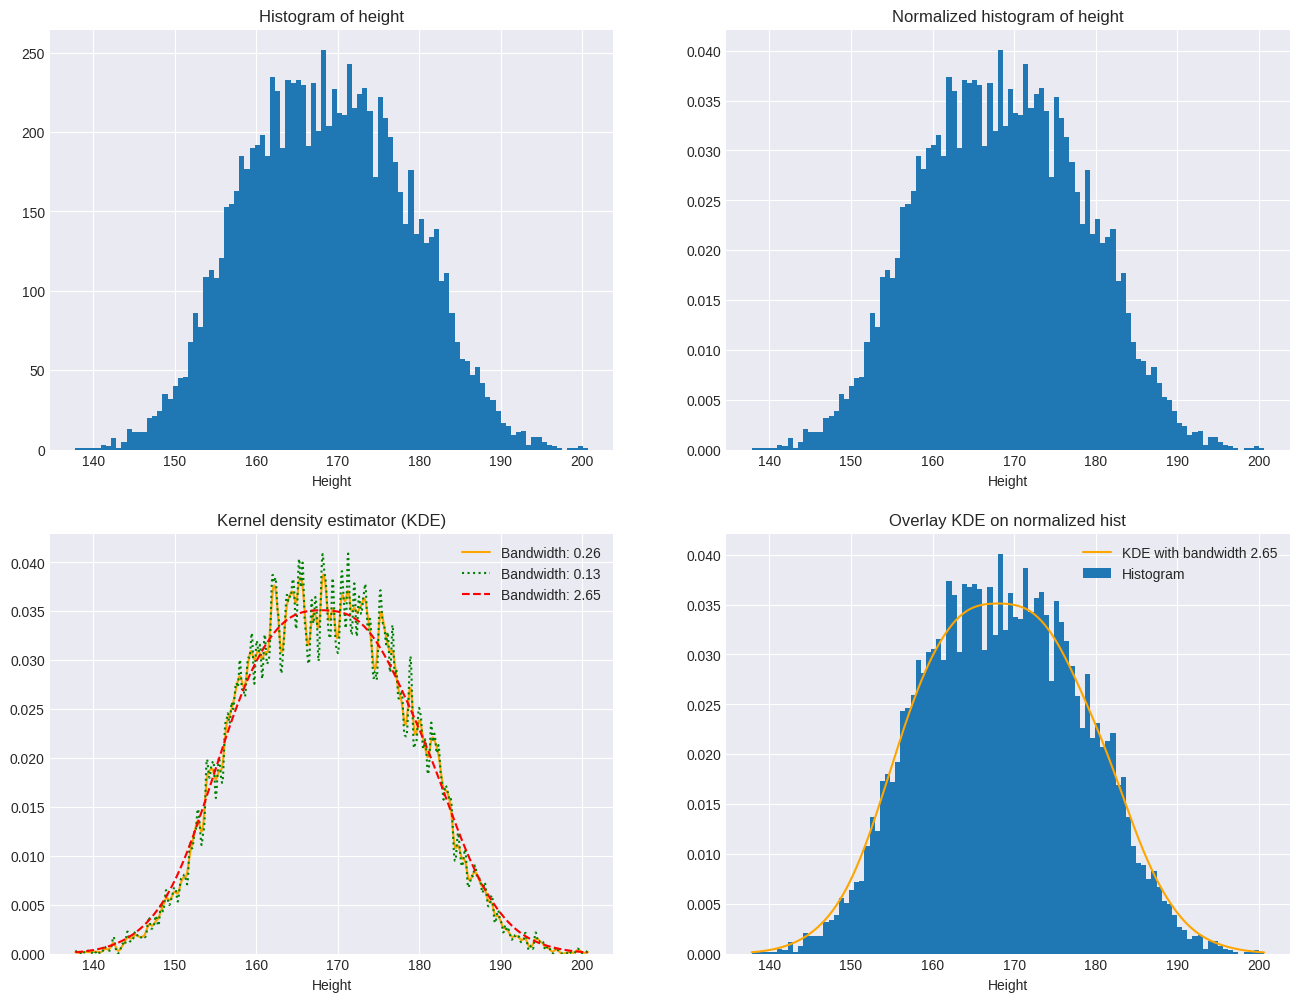

In [23]:
# Histogram and probability density
fig, axes = plt.subplots(2, 2, figsize=(16,12), dpi=dpi) 

axes[0, 0].hist(table_data.height, bins=100) 
axes[0, 0].set_title("Histogram of height")
axes[0, 0].set_xlabel("Height")

axes[0, 1].hist(table_data.height, bins=100, density=True)
axes[0, 1].set_title("Normalized histogram of height")
axes[0, 1].set_xlabel("Height")

# Let us calculate the kernel density estimator 
import math
# Step 1. Choose a kernel function. Let's use the Gaussian kernel
def kernel_function(x):
    return 1/math.sqrt(2*math.pi)*np.exp(-np.power(x,2)/2)
# Step 2. Estimate bandwidth using Silverman's Rule
def silverman_bandwidth(x):
    return np.power(x.std()*(4/3/x.size), 1/5) 
# Step 3. Density estimation
bins = np.linspace(table_data.height.min(), table_data.height.max(), num=1000) # define bins
def calculate_kde(x, kernel_function, bins, bandwidth):
    _kde = lambda b: 1/bandwidth * kernel_function((x-b)/bandwidth).mean()
    return np.vectorize(_kde)(bins)

silverman = silverman_bandwidth(table_data.height)
kde = calculate_kde(table_data.height, kernel_function, bins, silverman)
kde_b1 = calculate_kde(table_data.height, kernel_function, bins, silverman*0.5)
kde_b2 = calculate_kde(table_data.height, kernel_function, bins, silverman*10)
axes[1, 0].plot(bins, kde, c="orange", label="Bandwidth: %.2f"%silverman)
axes[1, 0].plot(bins, kde_b1, c="green", linestyle="dotted", label="Bandwidth: %.2f"%(silverman*0.5))
axes[1, 0].plot(bins, kde_b2, c="red", linestyle="dashed", label="Bandwidth: %.2f"%(silverman*10))
axes[1, 0].set_ylim(ymin=0)
axes[1, 0].set_title("Kernel density estimator (KDE)")
axes[1, 0].set_xlabel("Height")
axes[1, 0].legend()
# We can also plot it using pandas: table_data["height"].plot.kde() check out how it works!

axes[1, 1].plot(bins, kde_b2, label="KDE with bandwidth %.2f"%(silverman*10), c="orange")
axes[1, 1].hist(table_data.height, bins=100, density=True, label="Histogram")
axes[1, 1].set_title("Overlay KDE on normalized hist")
axes[1, 1].set_xlabel("Height")
axes[1, 1].legend()
plt.show()


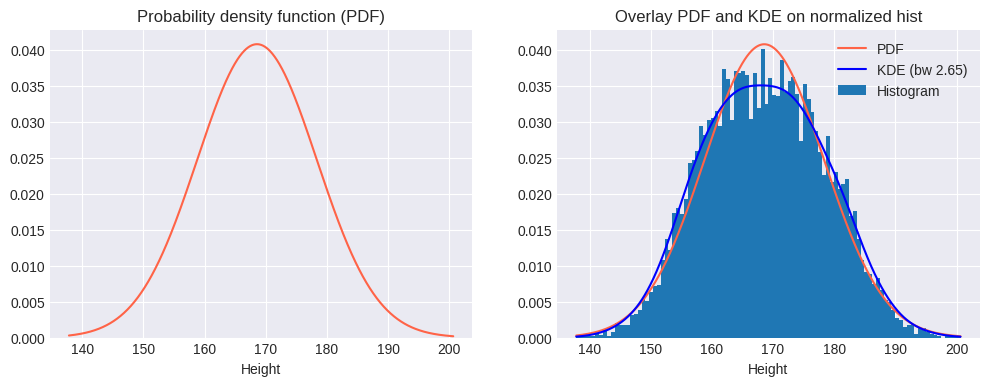

In [24]:
# Histogram and probability density
fig, axes = plt.subplots(1, 2, figsize=(12,4), dpi=dpi) 

# Maximum likelihood estimation of the Gaussian parameters
estimated_mean = table_data.height.mean()
estimated_std = table_data.height.std()
x = np.linspace(table_data.height.min(), table_data.height.max(), num=1000)
pdf = stats.norm.pdf(x, estimated_mean, estimated_std)
axes[0].plot(x, pdf, c="tomato")
axes[0].set_ylim(ymin=0)
axes[0].set_title("Probability density function (PDF)")
axes[0].set_xlabel("Height")

axes[1].plot(x, pdf, label="PDF", c="tomato")
axes[1].plot(x, kde_b2, label="KDE (bw %.2f)"%(silverman*10), c="blue")
axes[1].hist(table_data.height, bins=100, density=True, label="Histogram")
axes[1].set_title("Overlay PDF and KDE on normalized hist")
axes[1].set_xlabel("Height")
axes[1].legend()
plt.show()

We got the same curve! Coolio!


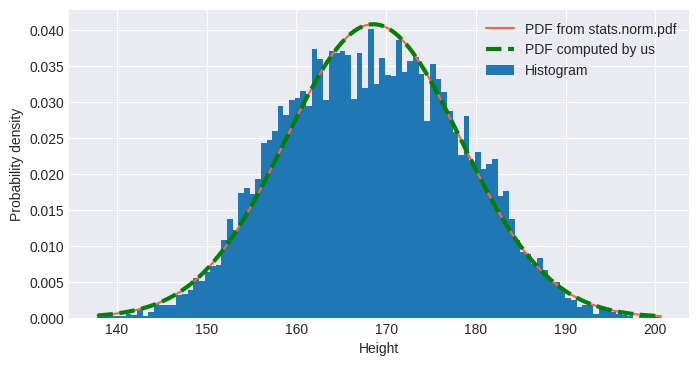

In [25]:
# Now let's try to compute the pdf ourselves without stats!
def norm_pdf(x, mean, std):
    density = (1/(math.sqrt(2*math.pi)*abs(std)))*np.exp(-np.power((x-mean)/abs(std),2)/2)
    return density

fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=dpi) 
ax.plot(x, pdf, label="PDF from stats.norm.pdf", c="tomato")
ax.plot(x, norm_pdf(x, estimated_mean, estimated_std), label="PDF computed by us", c="green", linestyle='dashed', linewidth=3)
ax.hist(table_data.height, bins=100, density=True, label="Histogram")
ax.set_xlabel("Height")
ax.set_ylabel("Probability density") 
plt.legend();
print("We got the same curve! Coolio!")

### Quantile and standard deviation in Gaussian distribution

+ Standard deviation: $\sigma=\sqrt{E[X^2]-(E[X])^2}$

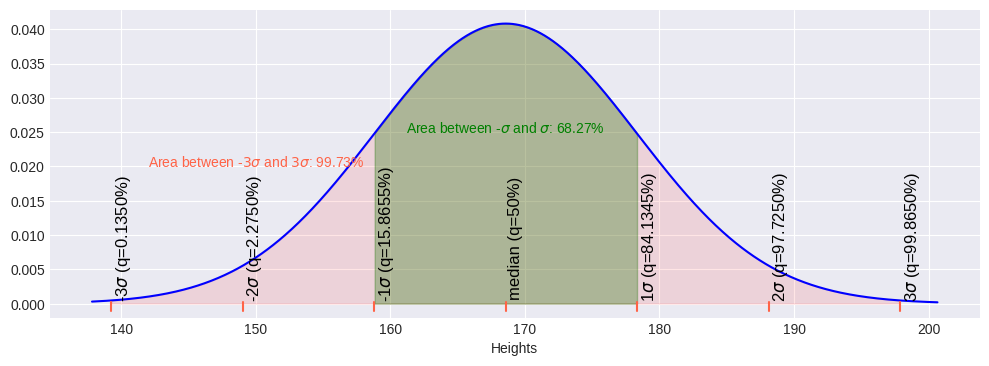

In [26]:
# Check out: https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
fig, ax = plt.subplots(1, 1, figsize=(12,4), dpi=dpi) 
ax.set_xlabel("Heights")
ax.plot(x, pdf, c="b")

norm = stats.norm(estimated_mean, estimated_std)
median = estimated_mean
quantile1nsigma, quantile1sigma = estimated_mean - estimated_std, estimated_mean + estimated_std
quantile2nsigma, quantile2sigma = estimated_mean - 2*estimated_std, estimated_mean + 2*estimated_std
quantile3nsigma, quantile3sigma = estimated_mean - 3*estimated_std, estimated_mean + 3*estimated_std

q = norm.cdf(median)
q1n = norm.cdf(quantile1nsigma)
q1 = norm.cdf(quantile1sigma)
q2n = norm.cdf(quantile2nsigma)
q2 = norm.cdf(quantile2sigma)
q3n = norm.cdf(quantile3nsigma)
q3 = norm.cdf(quantile3sigma)

add_vert_line(ax, [median, 
                   quantile1nsigma, 
                   quantile1sigma, 
                   quantile2nsigma, 
                   quantile2sigma, 
                   quantile3nsigma, 
                   quantile3sigma], 
              ["median (q=50%)", 
               "-1$\sigma$ (q=%s)"%"{:.4f}%".format(100*q1n), 
               "1$\sigma$ (q=%s)"%"{:.4f}%".format(100*q1),
               "-2$\sigma$ (q=%s)"%"{:.4f}%".format(100*q2n), 
               "2$\sigma$ (q=%s)"%"{:.4f}%".format(100*q2),
               "-3$\sigma$ (q=%s)"%"{:.4f}%".format(100*q3n), 
               "3$\sigma$ (q=%s)"%"{:.4f}%".format(100*q3)], 
              0.001, ymin=0.02, ymax=0.05)
one_sigma = x[(x >= quantile1nsigma) & (x <= quantile1sigma)]
pdf_one_sigma = pdf[(x >= quantile1nsigma) & (x <= quantile1sigma)]
ax.fill_between(one_sigma, pdf_one_sigma, 0, alpha=.3, color="green")
ax.annotate("Area between -$\sigma$ and $\sigma$: %s"%"{:.2f}%".format(100*q1-100*q1n), 
            xy=(median, 0.025), ha="center", color="green");

three_sigma = x[(x >= quantile3nsigma) & (x <= quantile3sigma)]
pdf_three_sigma = pdf[(x >= quantile3nsigma) & (x <= quantile3sigma)]
ax.fill_between(three_sigma, pdf_three_sigma, 0, alpha=.1, color="red")
ax.annotate("Area between -$3\sigma$ and $3\sigma$: %s"%"{:.2f}%".format(100*q3-100*q3n), 
            xy=(150, 0.020), ha="center", color="tomato");



### Panic alert!!! How do I know if Gaussian distribution is a good description of the data? Or is it more uniform?

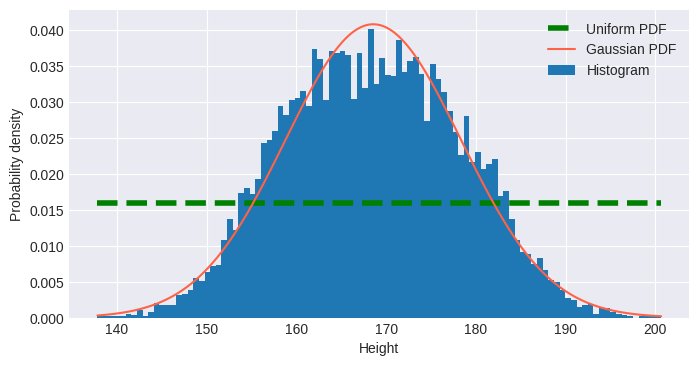

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=dpi)
# Step 1: visual inspection!!!
# Let us also plot uniform distribution here
estimated_range = table_data.height.max() - table_data.height.min()
estimated_min = table_data.height.min()
pdf_uniform = stats.uniform.pdf(x, loc=estimated_min, scale=estimated_range)
pdf_gaussian = stats.norm.pdf(x, loc=estimated_mean, scale=estimated_std) # We have computed this before, but we put it here to be more explicit 
ax.plot(x, pdf_uniform, label="Uniform PDF", c="green", linewidth=4, linestyle="dashed")
ax.plot(x, pdf_gaussian, label="Gaussian PDF", c="tomato")
ax.hist(table_data.height, bins=100, density=True, label="Histogram")
ax.set_xlabel("Height")
ax.set_ylabel("Probability density") 
plt.legend();

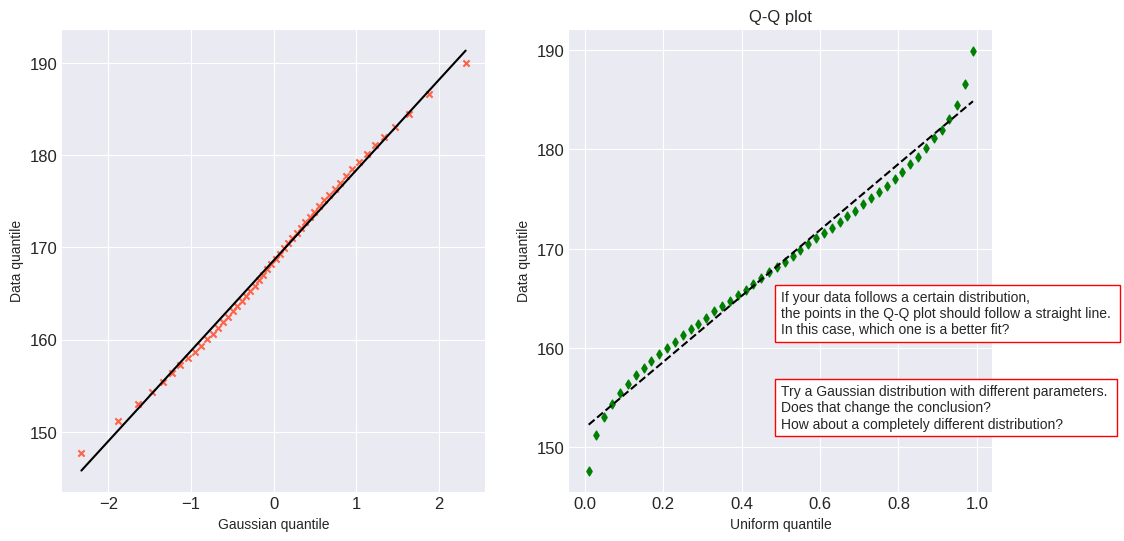

In [28]:
# Step 2: Q-Q plot to be more sure!

# Step 2.1: Calculate quantiles for data, Gaussian distribution and uniform distribution
qs = [0.01*q for q in range(1, 100, 2)]
data_quantiles = table_data["height"].quantile(qs)
# Try different parameters for Gaussian and uniform distribution and see what differences does it make? 
# How about a completely different distribution?
gaussian_quantiles = stats.norm.ppf(qs, loc=0, scale=1)
uniform_quantiles = stats.uniform.ppf(qs, loc=0, scale=1) 

# Construct a quantile table with pandas!
quantile_table = pd.DataFrame({"Data": data_quantiles,
                               "Uniform": uniform_quantiles,
                               "Gaussian": gaussian_quantiles})
# Step 2.2: plot these quantiles: 1) Data vs gaussian quantile and 2) Data vs uniform quantile
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=dpi)
quantile_table.plot.scatter(x="Gaussian", y="Data", ax=axes[0], marker="x", color="tomato", fontsize=12)
quantile_table.plot.scatter(x="Uniform", y="Data", ax=axes[1], marker="d", color="green", fontsize=12)

# Step 2.3: fit a straight line to each scatter plot and plot them
pg = np.polyfit(x=quantile_table["Gaussian"], y=quantile_table["Data"], deg=1)
pu = np.polyfit(x=quantile_table["Uniform"], y=quantile_table["Data"], deg=1)

fitted_line_gaussian = pg[1] + pg[0]*quantile_table["Gaussian"]
fitted_line_uniform = pu[1] + pu[0]*quantile_table["Uniform"]

axes[0].plot(quantile_table["Gaussian"], fitted_line_gaussian, color='k')
axes[0].set_xlabel("Gaussian quantile")
axes[0].set_ylabel("Data quantile")

axes[1].plot(quantile_table["Uniform"], fitted_line_uniform, color='k', linestyle="dashed")

axes[1].set_xlabel("Uniform quantile")
axes[1].set_ylabel("Data quantile")
axes[1].set_title("Q-Q plot")

axes[1].text(quantile_table["Uniform"].mean(), quantile_table["Data"].max()*0.85, 
             "If your data follows a certain distribution, \nthe points in the Q-Q plot should follow a straight line. \nIn this case, which one is a better fit?", 
        bbox=dict(edgecolor='red', facecolor="white"));
axes[1].text(quantile_table["Uniform"].mean(), quantile_table["Data"].max()*0.8, 
             "Try a Gaussian distribution with different parameters. \nDoes that change the conclusion? \nHow about a completely different distribution?", 
        bbox=dict(edgecolor='red', facecolor="white"));


         count       mean       std        min        25%        50%  \
gender                                                                 
Female  5000.0  61.625102  8.628446  29.347484  55.761968  61.741897   
Male    4999.0  84.826148  8.966568  51.211912  78.874012  84.834813   

              75%         max  
gender                         
Female  67.499501   91.733257  
Male    90.880200  122.465267  


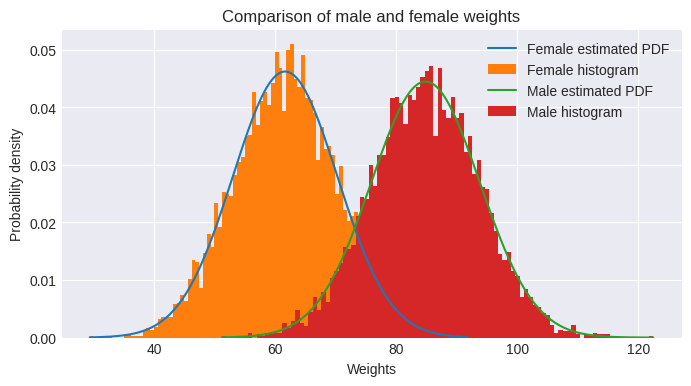

In [29]:
# How to compare two groups, e.g. female to male?
# Split into two groups with respect to gender
gender_groups = table_data.groupby('gender')
print(gender_groups.describe()['weight'])


data_female = gender_groups.get_group("Female") # One way to query data from pandas dataframe
data_male = gender_groups.get_group("Male")

weight_female = data_female.weight
weight_male = data_male.weight

def get_gaussian_pdf(data, sample_size=1000):
    _estimated_mean = data.mean()
    _estimated_std = data.std()
    x = np.linspace(data.min(), data.max(), num=sample_size)
    pdf = stats.norm.pdf(x, _estimated_mean, _estimated_std)
    return pdf, x, _estimated_mean, _estimated_std

fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=dpi) 

# Compare these two groups
pdf_weight_female, rvf, _, _ = get_gaussian_pdf(weight_female)
pdf_weight_male, rvm, _, _ = get_gaussian_pdf(weight_male)

ax.plot(rvf, pdf_weight_female, label="Female estimated PDF")
ax.hist(weight_female, bins=100, density=True, label="Female histogram")
ax.plot(rvm, pdf_weight_male, label="Male estimated PDF")
ax.hist(weight_male, bins=100, density=True, label="Male histogram")
ax.set_title("Comparison of male and female weights") 
ax.set_xlabel("Weights")
ax.set_ylabel("Probability density") 
ax.legend();

### Yet another application of quantile! Q-Q plot number two! 

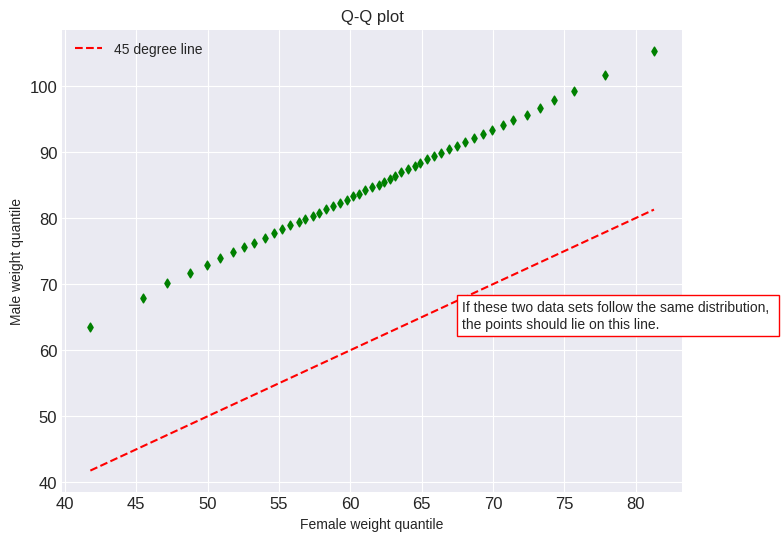

In [30]:
# Are these two datasets from the same distribution? 
# Calculate quantiles for these two datasets
qs = [q*0.01 for q in range(1, 100, 2)]
female_quantiles = weight_female.quantile(qs) 
male_quantiles = weight_male.quantile(qs)

quantiles = pd.DataFrame({"Female": female_quantiles, "Male": male_quantiles})

fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=dpi)
quantiles.plot.scatter(x="Female", y="Male", ax=ax, marker="d", color="green", fontsize=12)

ax.plot(quantiles["Female"], quantiles["Female"], color='r', linestyle="dashed", label="45 degree line")
ax.set_xlabel("Female weight quantile")
ax.set_ylabel("Male weight quantile")
ax.legend()
ax.set_title("Q-Q plot");
interpretation = "If these two data sets follow the same distribution, \nthe points should lie on this line."
ax.text(quantiles["Male"].mean()*0.8, quantiles["Female"].max()*0.78, 
        interpretation,
        bbox=dict(edgecolor='red', facecolor="white"));


### Box plot

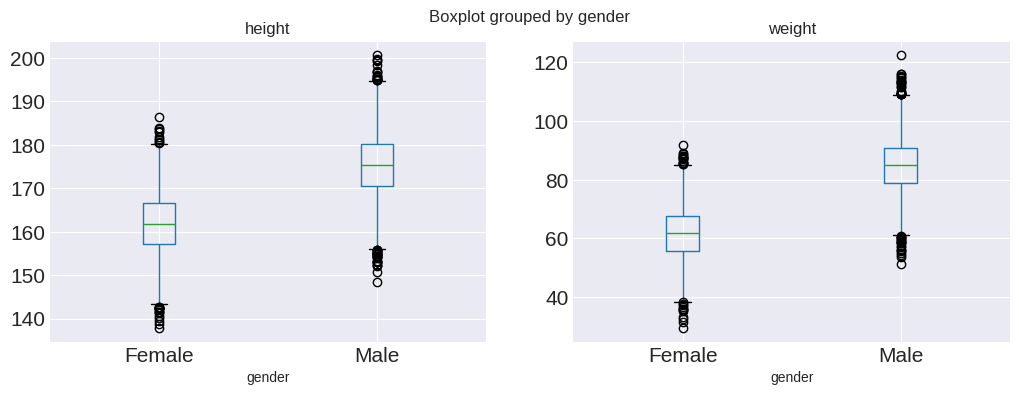

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12,4), dpi=dpi)

table_data.boxplot(grid=True, column="height", by="gender", ax=axes[0], fontsize=15)
table_data.boxplot(grid=True, column="weight", by="gender", ax=axes[1], fontsize=15);

Typically, the outliers are computed as everything outside this interval:
139.71336680517834 197.28726895719456


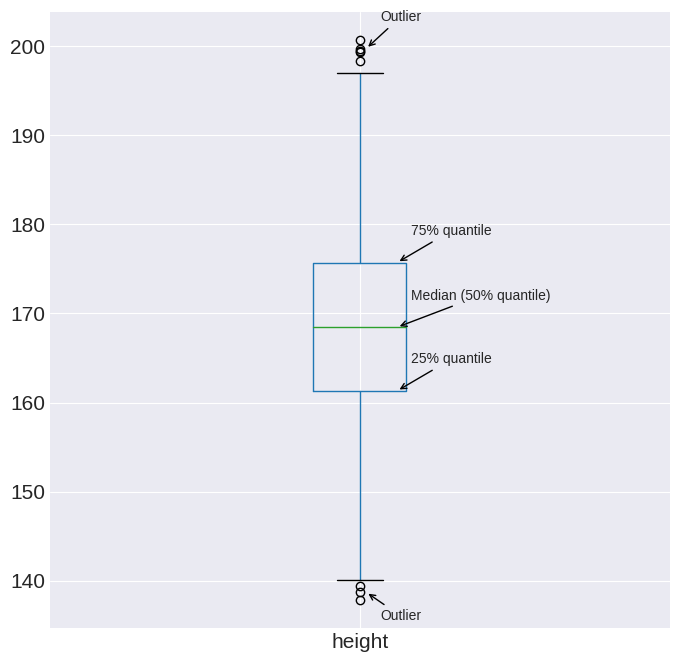

In [32]:
# Panic alert! What is this!??!!
# Worry not! I will annotate it for you! 
fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi=dpi)
boxplot = table_data[["height",]].boxplot(grid=True, column="height", ax=ax, fontsize=15, return_type='dict')
# Helper function
def annotate_boxplot(ax, text, y, x=1.06, text_offset=(10, 20)):
    """To show what is a box plot!"""
    ax.annotate(text, (x, y), xytext=text_offset, textcoords='offset points', arrowprops={'arrowstyle':'->'})

annotate_boxplot(ax, "Median (50% quantile)", boxplot['medians'][0].get_ydata()[0])
annotate_boxplot(ax, "25% quantile", boxplot['boxes'][0].get_ydata()[0])
annotate_boxplot(ax, "75% quantile", boxplot['boxes'][0].get_ydata()[2])
annotate_boxplot(ax, "Outlier", boxplot['fliers'][0].get_ydata()[0], x=1.01, text_offset=(10, -20))
annotate_boxplot(ax, "Outlier", boxplot['fliers'][0].get_ydata()[-1], x=1.01)

q_25 = np.quantile(table_data["height"], 0.25)
q_75 = np.quantile(table_data["height"], 0.75)

print("Typically, the outliers are computed as everything outside this interval:")
print(q_25-1.5*(q_75-q_25), q_75+1.5*(q_75-q_25))

### Scatter plot

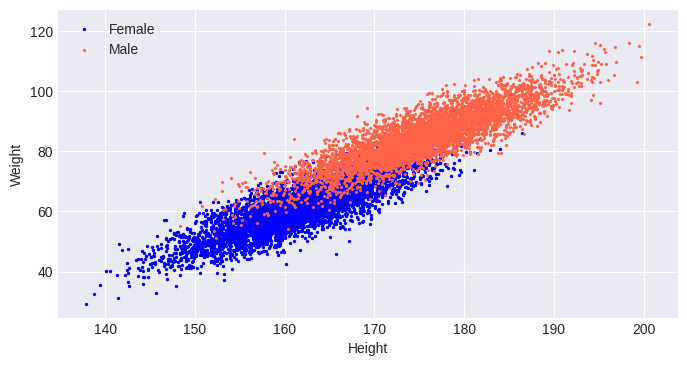

In [33]:
# Scatter plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=dpi) 
ax.scatter(data_female.height, data_female.weight, label="Female", s=2, c="blue")
ax.scatter(data_male.height, data_male.weight, label="Male", marker="x", s=2, c="tomato")
ax.set_xlabel("Height")
ax.set_ylabel("Weight")
ax.legend();

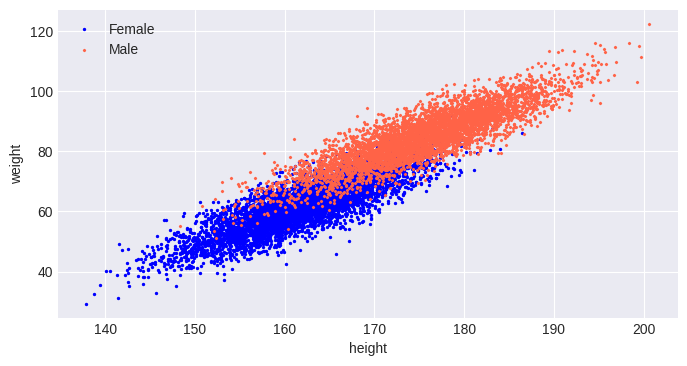

In [34]:
# Alternatively, we can use pandas for the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=dpi)
table_data.query("gender=='Female'").plot(x="height", 
                                          y="weight", 
                                          kind="scatter", 
                                          label="Female", marker="o", ax=ax, s=2, c="blue");
table_data.query("gender=='Male'").plot(x="height", 
                                        y="weight", 
                                        kind="scatter", 
                                        label="Male", marker="x", ax=ax, s=2, c="tomato");

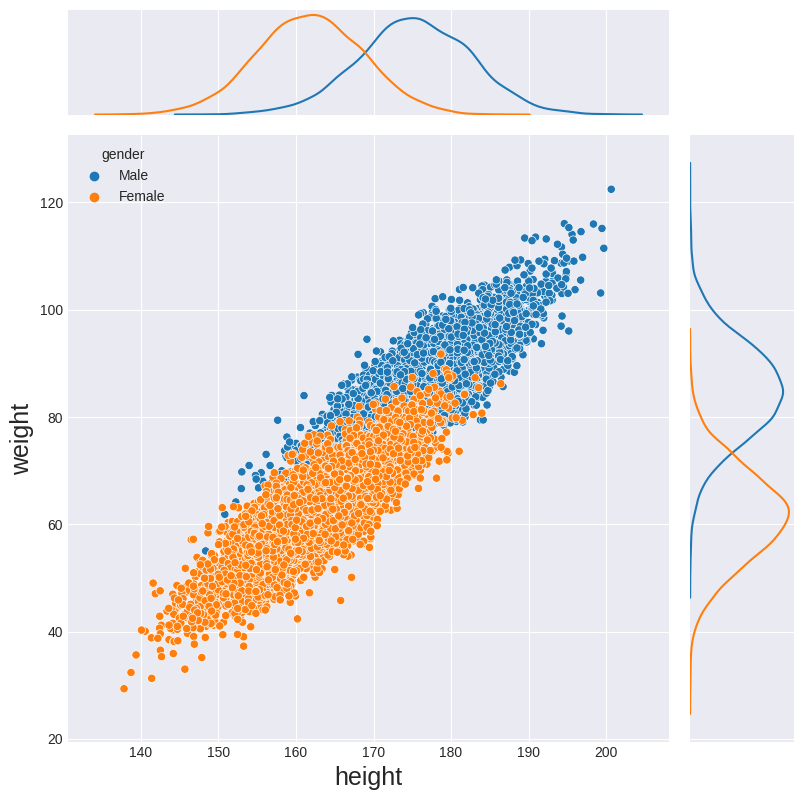

In [35]:
# Now let's try to use seaborn

# Here we are trying another way to index data
height_female = table_data.loc[table_data["gender"]=="Female", "height"]
height_male = table_data.loc[table_data["gender"]=="Male", "height"]
weight_female = table_data.loc[table_data["gender"]=="Female", "weight"] 
weight_male = table_data.loc[table_data["gender"]=="Male", "weight"]

grid = sns.JointGrid(x="height", y="weight", data=table_data, height=8)
g = grid.plot_joint(sns.scatterplot, hue="gender", data=table_data)

sns.kdeplot(x=height_male, ax=g.ax_marg_x)
sns.kdeplot(x=height_female, ax=g.ax_marg_x)
sns.kdeplot(y=weight_male, ax=g.ax_marg_y)
sns.kdeplot(y=weight_female, ax=g.ax_marg_y)

g.ax_joint.xaxis.label.set_fontsize(18)
g.ax_joint.yaxis.label.set_fontsize(18)

### Correlation and covariance

+ Covariance: $$cov(x,y) = \frac{1}{N-1}\sum^{N}_{i=1}\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)$$
where $\bar{x}=\frac{1}{N}\sum^{N}_{i=1}x_i$.

+ Correlation: $$corr(x,y) = \frac{cov(x,y)}{\sigma_x\sigma_y},~-1\leq corr(x,y)\leq 1$$
where $\sigma_x=\sqrt{\frac{1}{N-1}\sum^{N}_{i=1}(x_i-\bar{x})^2}$. 

#### Correlation

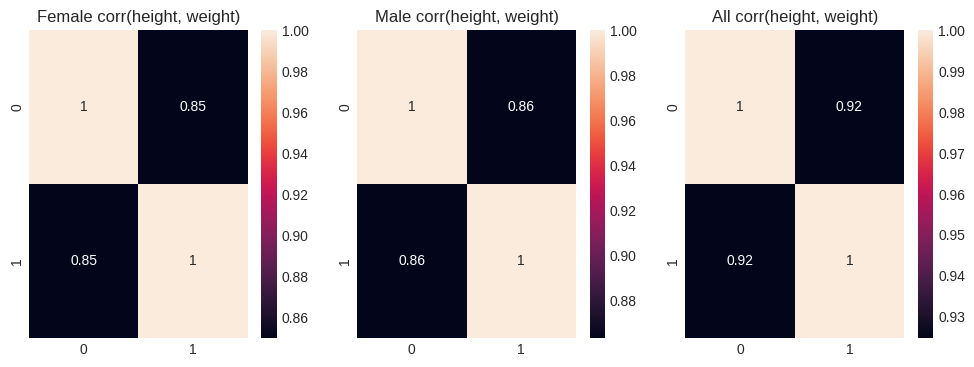

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(12,4), dpi=dpi)

corr_female = np.corrcoef(height_female, weight_female)
sns.heatmap(corr_female, annot = True, ax=axes[0])
axes[0].set_title("Female corr(height, weight)")

corr_male = np.corrcoef(height_male, weight_male)
sns.heatmap(corr_male, annot = True, ax=axes[1])
axes[1].set_title("Male corr(height, weight)")

corr = np.corrcoef(table_data.height, table_data.weight)
sns.heatmap(corr, annot = True, ax=axes[2])
axes[2].set_title("All corr(height, weight)")

plt.show()


Instead of having two vectors table_data.height and table_data.weight with shapes (9999,) ,  (9999,) ,  respectively,we concatenate them into an array with shape: (2, 9999) .
Each row is called a variable (or a feature). Each column is an observation (or an instance).

The correlation matrix is the same as before:
[[1.         0.92473423]
 [0.92473423 1.        ]]


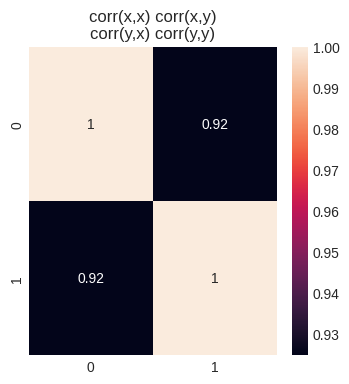

In [37]:
# Before we move on, we show another way of arranging data.
data_array = np.asarray([table_data.height, table_data.weight])
print("Instead of having two vectors table_data.height and table_data.weight with shapes", 
      table_data.height.shape, 
      ", ",
      table_data.weight.shape,
      ", ",
     "respectively,we concatenate them into an array with shape:", data_array.shape, ".") 
print("Each row is called a variable (or a feature). Each column is an observation (or an instance).")
print("")
corr_vectors = np.corrcoef(data_array)
print("The correlation matrix is the same as before:")
print(corr_vectors)

fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi=dpi)
sns.heatmap(corr_vectors, annot = True, ax=ax)
ax.set_title("corr(x,x) corr(x,y)\ncorr(y,x) corr(y,y)")

plt.show()


#### Covariance matrix

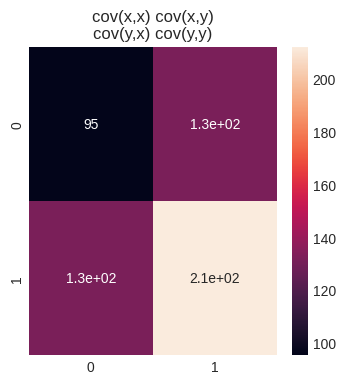

In [38]:
cov = np.cov(data_array)
fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi=dpi)
sns.heatmap(cov, annot = True, ax=ax)
ax.set_title("cov(x,x) cov(x,y)\ncov(y,x) cov(y,y)");

## Application 4: a table with categorical values as data  

### Load data

In [39]:
# More info can be found here: https://data.world/nrippner/titanic-disaster-dataset
titanic = pd.read_csv(os.path.join(data_dir, "titanic_train.csv"))[["Survived", "Pclass", "Embarked", "Sex"]]
print("Survived: if passenger has survived")
print("Pclass  : passenger class (1: 1st; 2: 2nd; 3: 3rd)")
print("Embarked: port of embarkation (C: Cherbourg; Q: Queenstown; S: Southampton)")  
print("Sex     : passenger sex (male, female)")
titanic.head()

Survived: if passenger has survived
Pclass  : passenger class (1: 1st; 2: 2nd; 3: 3rd)
Embarked: port of embarkation (C: Cherbourg; Q: Queenstown; S: Southampton)
Sex     : passenger sex (male, female)


,Survived,Pclass,Embarked,Sex
0,0,3,S,male
1,1,1,C,female
2,1,3,S,female
3,1,1,S,female
4,0,3,S,male


### Descriptive analysis

Text(0.5, 1.0, 'Pie chart')

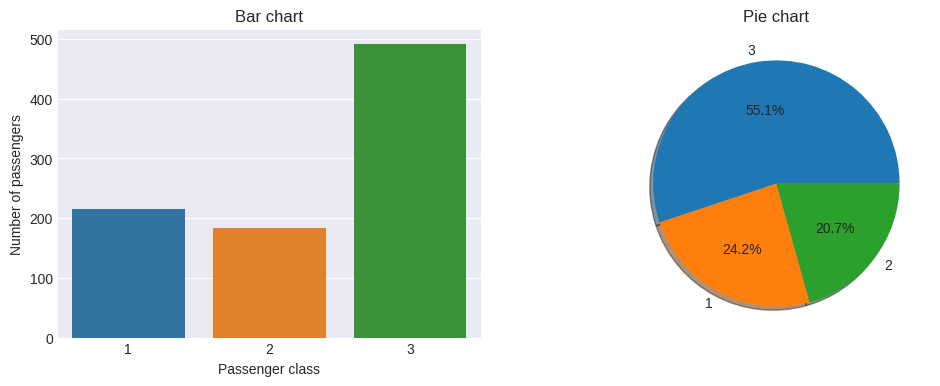

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12,4), dpi=dpi)
pclass = Counter(titanic["Pclass"])
ports = list(pclass.keys())
counts = list(pclass.values())
sns.barplot(x=ports, y=counts, ax=axes[0])
axes[0].set_xlabel("Passenger class")
axes[0].set_ylabel("Number of passengers")
axes[0].set_title("Bar chart")
axes[1].pie(x=list(pclass.values()), 
            labels=list(pclass.keys()), 
            autopct='%1.1f%%', shadow=True); 
axes[1].set_title("Pie chart")

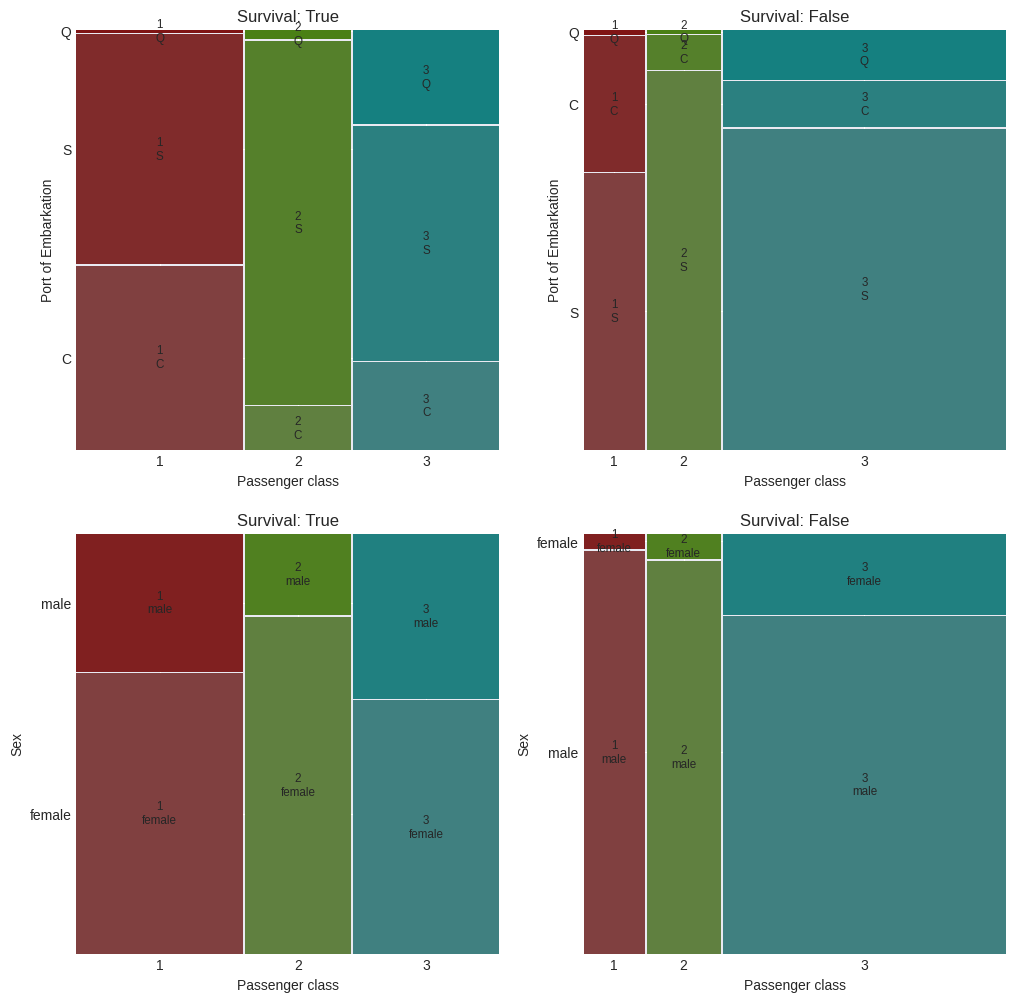

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(12,12), dpi=dpi)
mosaic(titanic.query("Survived==1").sort_values("Pclass"), ["Pclass", "Embarked"], ax=axes[0, 0])
axes[0,0].set_xlabel("Passenger class")
axes[0,0].set_ylabel("Port of Embarkation")
axes[0,0].set_title("Survival: True")
mosaic(titanic.query("Survived==0").sort_values("Pclass"), ["Pclass", "Embarked"], ax=axes[0, 1])
axes[0,1].set_xlabel("Passenger class")
axes[0,1].set_ylabel("Port of Embarkation")
axes[0,1].set_title("Survival: False")
mosaic(titanic.query("Survived==1").sort_values("Pclass"), ["Pclass", "Sex"], ax=axes[1, 0])
axes[1,0].set_xlabel("Passenger class")
axes[1,0].set_ylabel("Sex")
axes[1,0].set_title("Survival: True")
mosaic(titanic.query("Survived==0").sort_values("Pclass"), ["Pclass", "Sex"], ax=axes[1, 1])
axes[1,1].set_xlabel("Passenger class")
axes[1,1].set_ylabel("Sex")
axes[1,1].set_title("Survival: False")
plt.show()


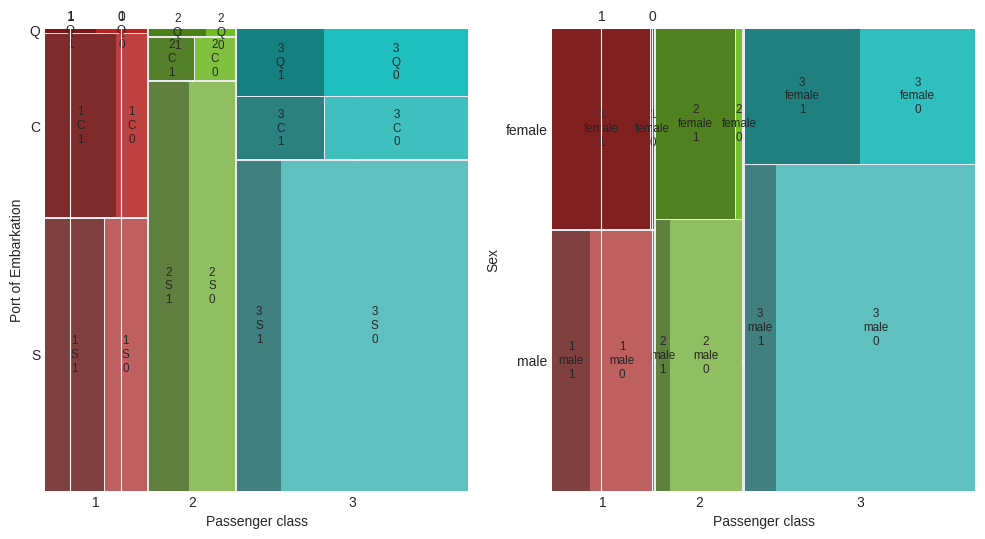

In [42]:
# You can add more variables to one mosaic plot
fig, axes = plt.subplots(1, 2, figsize=(12,6), dpi=dpi)
mosaic(titanic.sort_values("Pclass"), ["Pclass", "Embarked", "Survived"], ax=axes[0])
axes[0].set_xlabel("Passenger class")
axes[0].set_ylabel("Port of Embarkation")
mosaic(titanic.sort_values("Pclass"), ["Pclass", "Sex", "Survived"], ax=axes[1])
axes[1].set_xlabel("Passenger class")
axes[1].set_ylabel("Sex")
plt.show()